## CNN Implementation.

In [1]:
# Working on 2 datasets. These datasets are common and available readily.

# - Fashion MNIST.

# - CIFAR-10

In [2]:
# Basics of data augmentation. This is used when the images are too large to fit in the RAM.


 - We will be creating a basic model at first and then try to improve the model.

In [3]:
# Source of Data.

# - Fashion MNIST - tf.keras.datasets.fashion_mnist.load_data()

# - CIFAR-10 - tf.keras.datasets.cifar10.load_data()

In [4]:
# Importing tensorflow and check the version.

import tensorflow as tf

print(tf.__version__)

2.1.0


In [7]:
# Importing necessary libraries.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [29]:
# Load the data.

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

type(fashion_mnist)

tuple

In [30]:
(x_train, y_train), (x_test, y_test) = fashion_mnist

In [31]:
print("Shape of X train: ", x_train.shape)

print("Shape of y train: ", y_train.shape)

print("Shape of X test: ", x_test.shape)

print("Shape of y test: ", y_test.shape)

Shape of X train:  (60000, 28, 28)
Shape of y train:  (60000,)
Shape of X test:  (10000, 28, 28)
Shape of y test:  (10000,)


In [32]:
# Each pixel value ranges from 0 to 255. Dividing by 255 will be get in it in range 0-1 which is easier for computation.

x_train, x_test = x_train / 255.0 , x_test / 255.0

In [33]:
# Convolution layer expects a Height, Width, Color. We have only 2D. Coverting 2D to 3D.

x_train = np.expand_dims(x_train, axis=-1)

print(x_train.shape)

x_test = np.expand_dims(x_test, axis=-1)

print(x_test.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [36]:
# Getting the number of classes.

K = len(set(y_train))

K


(28, 28, 1)

In [37]:
## Building a model using keras functional API.

i = Input(shape=x_train[1].shape)

x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Flatten()(x)

x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)

x = Dropout(0.2)(x)

x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [38]:
# Compile and fit.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 49s 820us/sample - loss: 0.5182 - accuracy: 0.8086 - val_loss: 0.4151 - val_accuracy: 0.8417
Epoch 2/20
60000/60000 [==============================] - 44s 728us/sample - loss: 0.3529 - accuracy: 0.8668 - val_loss: 0.3334 - val_accuracy: 0.8782
Epoch 3/20
60000/60000 [==============================] - 44s 737us/sample - loss: 0.3065 - accuracy: 0.8845 - val_loss: 0.3247 - val_accuracy: 0.8786
Epoch 4/20
60000/60000 [==============================] - 42s 707us/sample - loss: 0.2744 - accuracy: 0.8974 - val_loss: 0.3175 - val_accuracy: 0.8831
Epoch 5/20
60000/60000 [==============================] - 45s 754us/sample - loss: 0.2495 - accuracy: 0.9058 - val_loss: 0.2924 - val_accuracy: 0.8931
Epoch 6/20
60000/60000 [==============================] - 45s 748us/sample - loss: 0.2295 - accuracy: 0.9136 - val_loss: 0.3032 - val_accuracy: 0.8968
Epoch 7/20
60000/60000 [====================

Confusion matrix, without normalization
[[858   0  20  24   5   2  86   0   5   0]
 [  2 972   0  16   4   1   4   0   1   0]
 [ 26   0 815   8  82   1  68   0   0   0]
 [ 15   4  17 904  31   0  28   0   1   0]
 [  0   2  41  23 855   0  78   0   1   0]
 [  1   0   0   1   0 977   0  11   0  10]
 [106   1  57  27 109   1 690   0   9   0]
 [  0   0   0   0   0  10   0 973   1  16]
 [  2   0   3   2   8   2   3   2 976   2]
 [  1   0   0   0   0   8   0  45   0 946]]


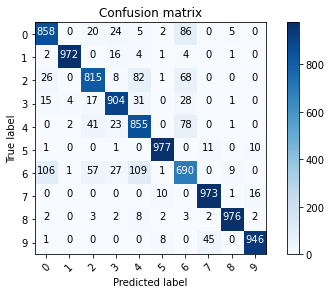

In [41]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [42]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

- If we check for wrong predictions 6 has been wrongly classified as 0 106 times and also wrongly classified as 4 109 times.

- Means Shirt has been classified as Tshirt/top and Coat. Makes sense since all the three items are visually similiar.


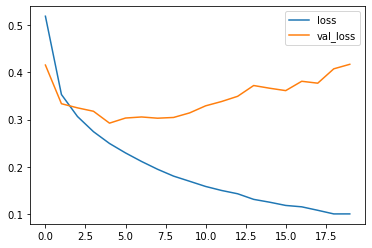

In [44]:
# Plotting loss and accuracy per iterations.

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()



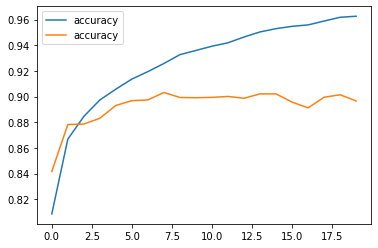

In [45]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='accuracy')
plt.legend()

 - Validation loss is increasing meaning the model is overfitting.
 - The validation accuracy remains almost constant meaning the model is confident of its wrong predictions which can be deduced from the loss incresing and accuracy remaining same.

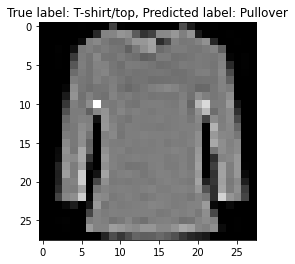

In [52]:
# Some misclassified examples.

wrong_pred = np.where(p_test != y_test)[0]

i = np.random.choice(wrong_pred)

plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s, Predicted label: %s" % (labels[y_test[i]], labels[p_test[i]]));

## CIFR10 Dataset.

In [55]:
#Loading dataset.

cifr10 = tf.keras.datasets.cifar10.load_data()

(x1_train, y1_train), (x1_test, y1_test) = cifr10

In [56]:
print("Shape of X train: ", x1_train.shape)

print("Shape of y train: ", y1_train.shape)

print("Shape of X test: ", x1_test.shape)

print("Shape of y test: ", y1_test.shape)

Shape of X train:  (50000, 32, 32, 3)
Shape of y train:  (50000, 1)
Shape of X test:  (10000, 32, 32, 3)
Shape of y test:  (10000, 1)


In [59]:
x1_train, x1_test = x1_train / 255.0 , x1_test / 255.0

y1_train, y1_test = y1_train.flatten(), y1_test.flatten()

# We need to flatten the target as the expected dimensions are 1 not 2.

In [60]:
print("Shape of X train: ", x1_train.shape)

print("Shape of y train: ", y1_train.shape)

print("Shape of X test: ", x1_test.shape)

print("Shape of y test: ", y1_test.shape)

Shape of X train:  (50000, 32, 32, 3)
Shape of y train:  (50000,)
Shape of X test:  (10000, 32, 32, 3)
Shape of y test:  (10000,)


In [61]:
K1 = len(set(y1_train))

K1

10

In [62]:
## Building a model using keras functional API.

i1 = Input(shape=x1_train[1].shape)

x1 = Conv2D(32, (3,3), strides=2, activation='relu')(i1)
x1 = Conv2D(64, (3,3), strides=2, activation='relu')(x1)
x1 = Conv2D(128, (3,3), strides=2, activation='relu')(x1)

x1 = Flatten()(x1)

x1 = Dropout(0.5)(x1)

x1 = Dense(512, activation='relu')(x1)

x1 = Dropout(0.2)(x1)

x1 = Dense(K, activation='softmax')(x1)

model1 = Model(i1, x1)

In [64]:
# Compile and fit.

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r1 = model1.fit(x1_train, y1_train, validation_data=(x1_test, y1_test), epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.5552 - accuracy: 0.4343 - val_loss: 1.2683 - val_accuracy: 0.5417
Epoch 2/20
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.2229 - accuracy: 0.5645 - val_loss: 1.1084 - val_accuracy: 0.6022
Epoch 3/20
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.0763 - accuracy: 0.6194 - val_loss: 1.0508 - val_accuracy: 0.6241
Epoch 4/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.9616 - accuracy: 0.6592 - val_loss: 0.9660 - val_accuracy: 0.6566
Epoch 5/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8676 - accuracy: 0.6927 - val_loss: 0.9476 - val_accuracy: 0.6597
Epoch 6/20
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.7918 - accuracy: 0.7189 - val_loss: 0.9459 - val_accuracy: 0.6736
Epoch 7/20
50000/50000 [==============================] 

In [65]:
# label mapping
labels1 = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

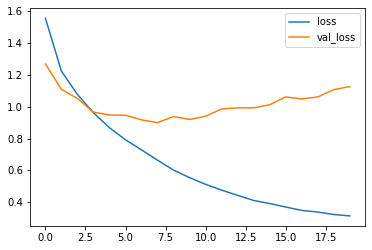

In [66]:
# Plotting loss and accuracy per iterations.

plt.plot(r1.history['loss'], label='loss')
plt.plot(r1.history['val_loss'], label='val_loss')
plt.legend()



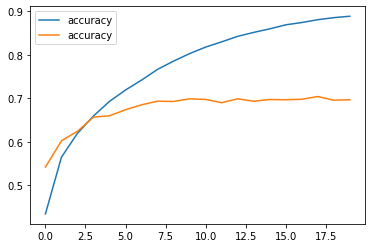

In [67]:
plt.plot(r1.history['accuracy'], label='accuracy')
plt.plot(r1.history['val_accuracy'], label='accuracy')
plt.legend()

- The loss has still not converged and the valdation loss is increasing. This suggests overfitting of the model.
- The accuracy also has still not converged. We might needs more epochs. The validation accuracy is steady.

- Since the validation is loss is increasing and the validation accuracy is still the same suggests overfitting.

Confusion matrix, without normalization
[[720  23  64  23  11   8  11  16  91  33]
 [ 22 848  10  13   3   2   5   4  23  70]
 [ 57  11 596  67 103  60  43  41  14   8]
 [ 32  13  80 470  73 178  54  63  13  24]
 [ 17   3  78  60 663  42  33  90   8   6]
 [ 13   7  48 171  61 586  27  69   9   9]
 [  4   9  38  75  55  40 749  15  11   4]
 [ 14   1  25  33  58  57   8 789   2  13]
 [ 63  35  17  20   7   7   6   4 828  13]
 [ 40 129  17  16   5  13   6  23  34 717]]


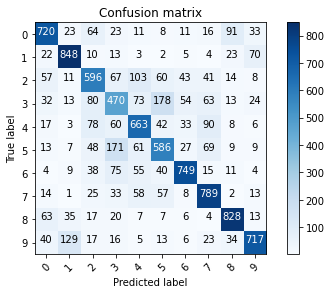

In [68]:
# Confusion matrix

p1_test = model1.predict(x1_test).argmax(axis=1)
cm = confusion_matrix(y1_test, p1_test)
plot_confusion_matrix(cm, list(range(10)))

## Imporving results using Batch Normalization.

In [79]:
# Building a model again. Will be adding batch normalization layer between two CNN layers.


from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

i2 = Input(shape=x1_train[0].shape)

x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(i2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)

x2 = MaxPooling2D((2, 2))(x2)

x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)

x2 = MaxPooling2D((2, 2))(x2)

x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)

x2 = MaxPooling2D((2, 2))(x2)


x2 = Flatten()(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(K, activation='softmax')(x2)

model2 = Model(i2, x2)

In [80]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
# Fit
r2 = model2.fit(x1_train, y1_train, validation_data=(x1_test, y1_test), epochs=15
               )

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 907s 18ms/sample - loss: 0.2217 - accuracy: 0.9244 - val_loss: 0.6961 - val_accuracy: 0.8114
Epoch 2/15
50000/50000 [==============================] - 759s 15ms/sample - loss: 0.2009 - accuracy: 0.9324 - val_loss: 0.6764 - val_accuracy: 0.8172
Epoch 3/15
50000/50000 [==============================] - 713s 14ms/sample - loss: 0.1642 - accuracy: 0.9438 - val_loss: 0.7402 - val_accuracy: 0.8107
Epoch 4/15
50000/50000 [==============================] - 566s 11ms/sample - loss: 0.1545 - accuracy: 0.9482 - val_loss: 0.6733 - val_accuracy: 0.8211
Epoch 5/15
50000/50000 [==============================] - 468s 9ms/sample - loss: 0.1424 - accuracy: 0.9517 - val_loss: 0.7547 - val_accuracy: 0.8308
Epoch 6/15
12352/50000 [======>.......................] - ETA: 5:48 - loss: 0.1103 - accuracy: 0.9628

KeyboardInterrupt: 

- If we compare the epoch from the previous model we can see that the val_accuracy is significantly improving.

- Ideally I would have preffered to run this for 50 epochs to check the val_loss.

 - Will be uploading the same in Google Colab 